EDA of Tour and Travel

Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn import metrics
from xgboost import XGBClassifier

rcParams['figure.figsize'] = 15, 20

Loading Data

In [7]:
data = pd.read_csv('Customertravel.csv')

Data Analysis and Data Cleaning

In [8]:
data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [9]:
data.tail()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
949,31,Yes,Low Income,1,No,No,0
950,30,No,Middle Income,5,No,Yes,0
951,37,No,Middle Income,4,No,No,0
952,30,No,Low Income,1,Yes,Yes,0
953,31,Yes,High Income,1,No,No,0


Data Reading

In [10]:
print(data)

print('dimensions:')
print(data.shape)

print('Information:')
data.info()

     Age FrequentFlyer AnnualIncomeClass  ServicesOpted  \
0     34            No     Middle Income              6   
1     34           Yes        Low Income              5   
2     37            No     Middle Income              3   
3     30            No     Middle Income              2   
4     30            No        Low Income              1   
..   ...           ...               ...            ...   
949   31           Yes        Low Income              1   
950   30            No     Middle Income              5   
951   37            No     Middle Income              4   
952   30            No        Low Income              1   
953   31           Yes       High Income              1   

    AccountSyncedToSocialMedia BookedHotelOrNot  Target  
0                           No              Yes       0  
1                          Yes               No       1  
2                          Yes               No       0  
3                           No               No       0  
4

Duplicates Checking

In [11]:
data.isnull().values.any()
value = len(data[data.duplicated()])
print(value)

507


Statistical Summary

In [12]:
print("Statistical Summary")
data.describe().T

Statistical Summary


,count,mean,std,min,25%,50%,75%,max
Age,954.0,32.109015,3.337388,27.0,30.0,31.0,35.0,38.0
ServicesOpted,954.0,2.437107,1.606233,1.0,1.0,2.0,4.0,6.0
Target,954.0,0.234801,0.424097,0.0,0.0,0.0,0.0,1.0


In [13]:
data.describe(include = 'object')

,FrequentFlyer,AnnualIncomeClass,AccountSyncedToSocialMedia,BookedHotelOrNot
count,954,954,954,954
unique,3,3,2,2
top,No,Middle Income,No,No
freq,608,409,594,576


In [14]:
for col in data.describe(include = 'object') .columns:
    print(col)
    print(data[col].unique())
    print('-'*50)

FrequentFlyer
['No' 'Yes' 'No Record']
--------------------------------------------------
AnnualIncomeClass
['Middle Income' 'Low Income' 'High Income']
--------------------------------------------------
AccountSyncedToSocialMedia
['No' 'Yes']
--------------------------------------------------
BookedHotelOrNot
['Yes' 'No']
--------------------------------------------------


In [16]:
data.isnull().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

Data Visualization

In [18]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
features = ['FrequentFlyer','AnnualIncomeClass','AccountSyncedToSocialMedia','BookedHotelOrNot']
for f in features:
    data[f] = number.fit_transform(data[f])
data.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


BookedHotelOrNot
0    0.603774
1    0.396226
Name: proportion, dtype: float64


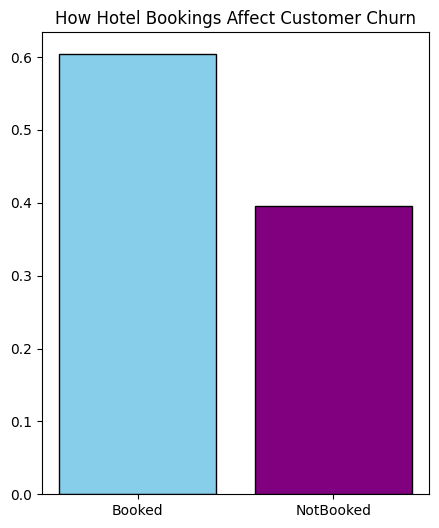

In [19]:
churn_perc = data ['BookedHotelOrNot'].value_counts(normalize = 1)
print(churn_perc)

plt.figure(figsize=(5,6))
plt.bar(["Booked","NotBooked"], data ['BookedHotelOrNot'].value_counts(normalize = 1), edgecolor = 'black', width = 0.8, color = ['skyblue', 'purple'])
plt.title('How Hotel Bookings Affect Customer Churn')
plt.show()

In [21]:
income = data.groupby("AnnualIncomeClass")
income = income.size()
income

AnnualIncomeClass
0    159
1    386
2    409
dtype: int64

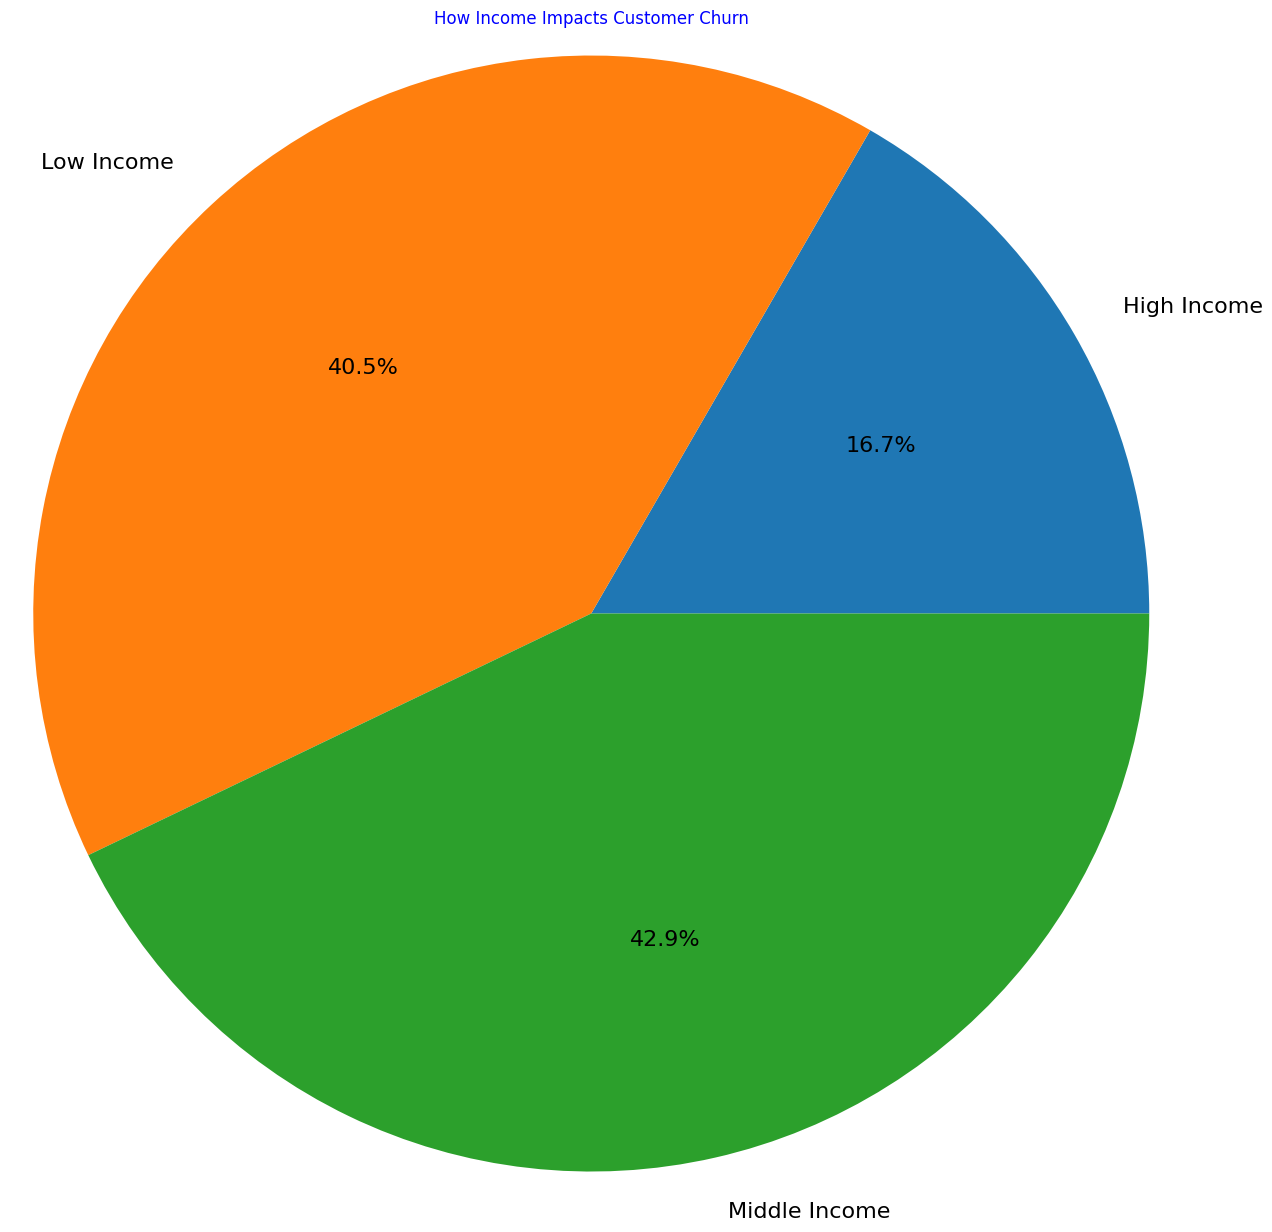

In [22]:
plt.pie(income.values , labels = ("High Income", "Low Income", "Middle Income" ), autopct='%1.1f%%', radius = 1.2, textprops = {"fontsize" : 16}) 
plt.title("How Income Impacts Customer Churn", c="b")
plt.show()

In [23]:
catcol = ['FrequentFlyer', 'AnnualIncomeClass', 'ServicesOpted','AccountSyncedToSocialMedia', 'BookedHotelOrNot', 'Target']

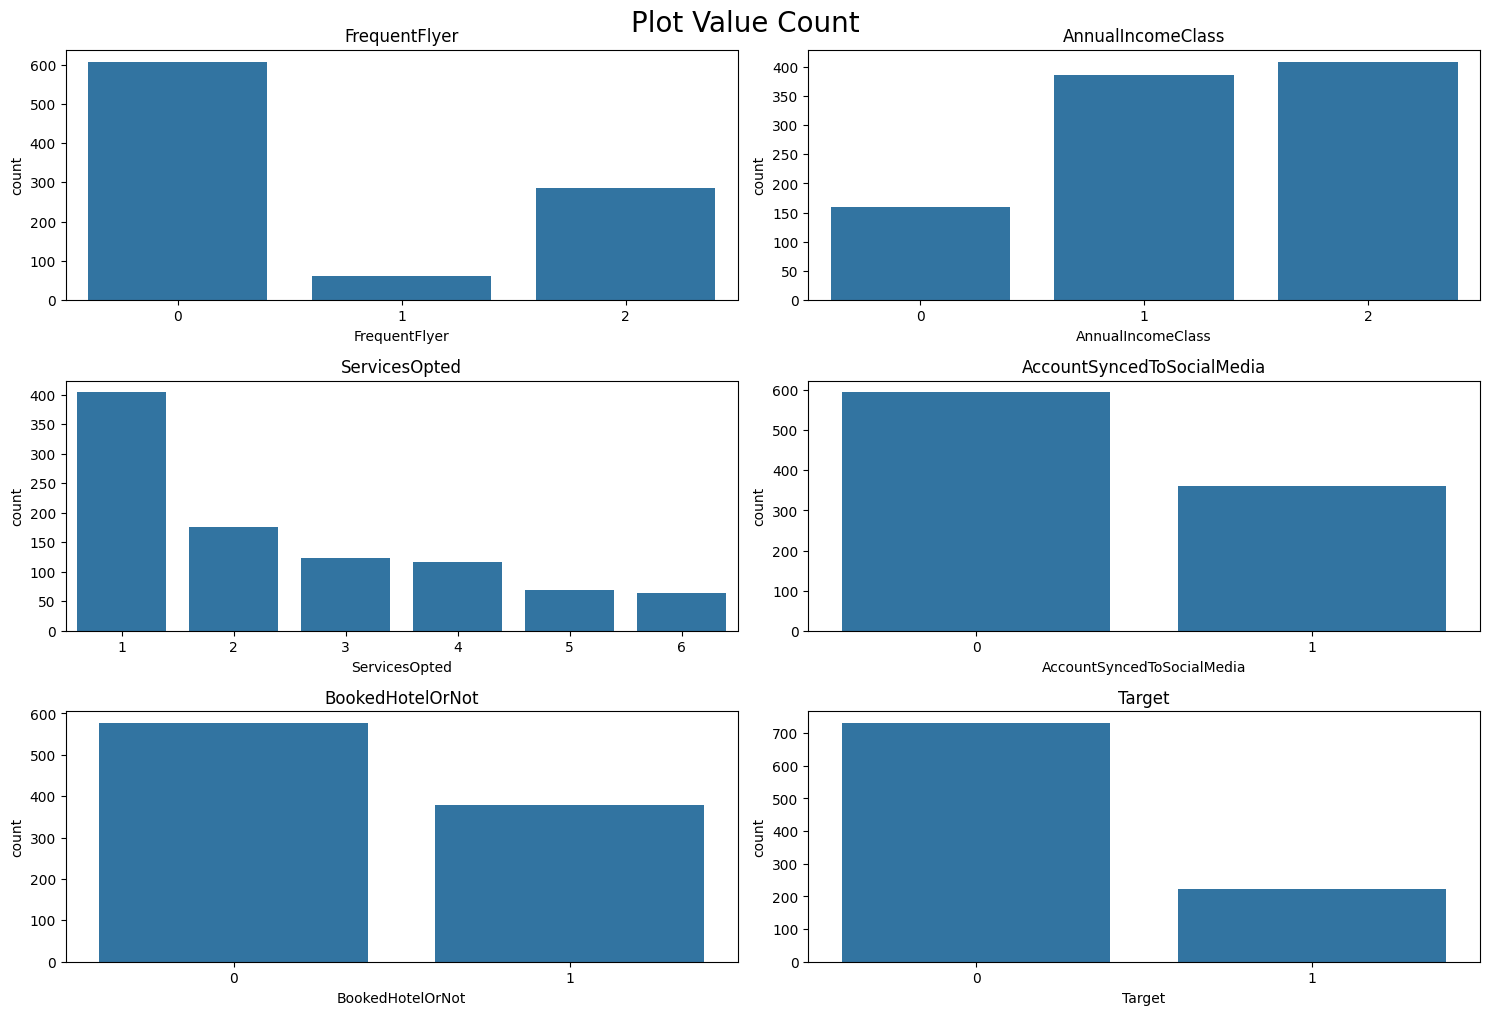

In [24]:
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Count", fontsize=20)
    sns.countplot(data=data, x=column)
    plt.title(f"{column}")
    plt.tight_layout()

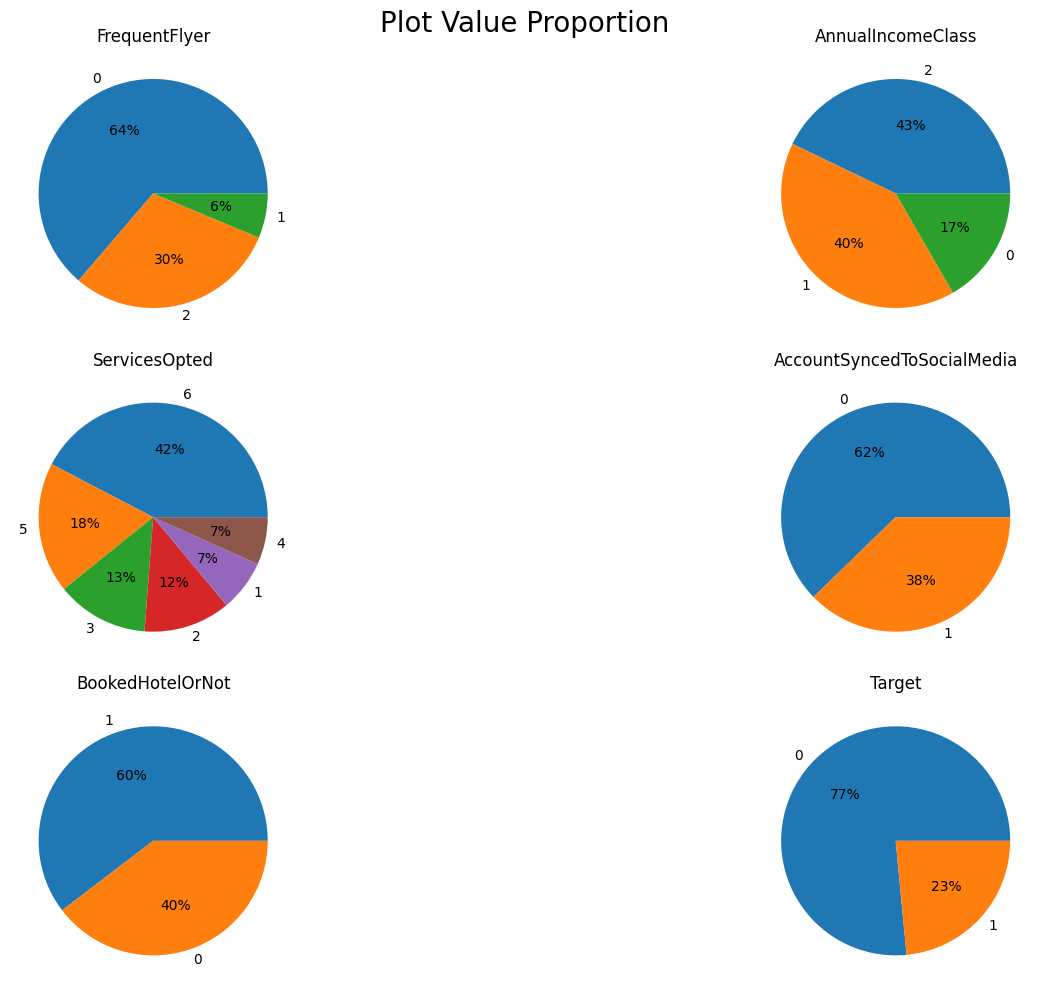

In [25]:
for i,column in enumerate(catcol):
    plt.subplot(len(catcol), 2, i+1)
    plt.suptitle("Plot Value Proportion", fontsize=20)
    plt.pie(x=data[column].value_counts(), labels=data[column].unique(), autopct='%.0f%%')
    plt.title(f"{column}")
    plt.tight_layout()

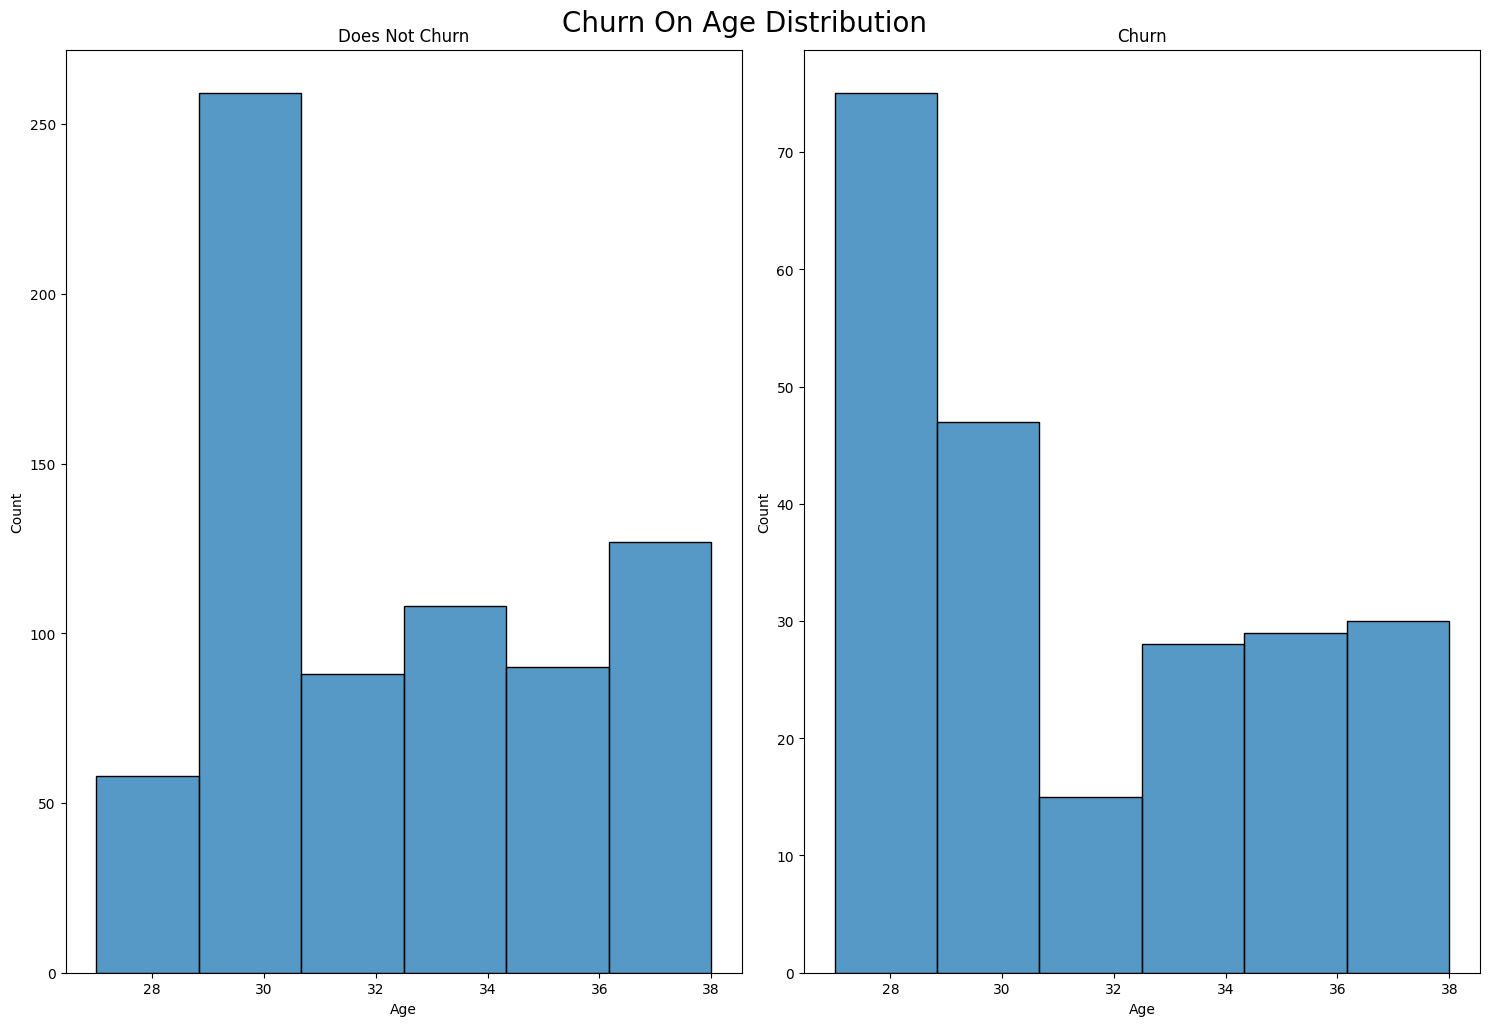

In [26]:
for i in range(2):
    plt.subplot(2, 2, i+1)
    plt.suptitle("Churn On Age Distribution", fontsize=20)
    sns.histplot(data=data[data.Target==i], x='Age', bins=6)
    plt.title(f"{'Churn' if i==1 else 'Does Not Churn'}")
    plt.tight_layout()

Analytical Summary

Customers who have made hotel reservations account for 60% of the overall population, whereas those who have not made hotel reservations account for 39% of the population, which is a significant number.

We found that customers with the highest yearly income have the lowest proportion of customer churn, whereas those with the lowest (40%) and middle (42%), have the highest percentage of churn.

Insights

The largest customer churn has been observed when a consumer has not made a hotel reservation. This may be due to a number of factors, including expensive hotel rates and longer waiting lists for reservations, both of which have a substantial impact on why people don't book hotels. This may help us understand how to run the campaign in order to shorten the waiting list.

The highest customer churn have also seen in the situation where customer have low and middle income. This may give us an idea of the needs of the customers, and you can utilise the insights to work on how to lower your pricing without affecting your revenue, which you can then offer to your customers, which can prevent the customer churn.